<a href="https://colab.research.google.com/github/erivandosena/Notebook_DataScience/blob/main/Notebook_BIX_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de Dados - Questionário

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

xlsx_link_file = 'https://docs.google.com/spreadsheets/d/1Sc6hN48b-lWbDdYNd_t9j8Bt0EZ8BUNG/export'

df_sheet_1 = pd.read_excel(xlsx_link_file, 'Sheet1', skiprows=4, usecols=lambda x: 'Unnamed' not in x)
df_sheet_2 = pd.read_excel(xlsx_link_file, 'Sheet2', skiprows=0, usecols=lambda x: 'Unnamed' not in x)
df_sheet_3 = pd.read_excel(xlsx_link_file, 'Sheet3', skiprows=0, usecols=lambda x: 'Unnamed' not in x)
df_sheet_4 = pd.read_excel(xlsx_link_file, 'Sheet4', skiprows=0, usecols=lambda x: 'Unnamed' not in x)

In [2]:
print("Dados de venda\n", df_sheet_1, "\n\nDados Missing\n", df_sheet_1.isna().sum(), "\n\nTipos de dados\n", df_sheet_1.dtypes)

print("\nDados de produto\n", df_sheet_2, "\n\nDados Missing\n", df_sheet_2.isna().sum(), "\n\nTipos de dados\n", df_sheet_2.dtypes)

print("\nDados de consumidores\n", df_sheet_3, "\n\nDados Missing\n", df_sheet_3.isna().sum(), "\n\nTipos de dados\n", df_sheet_3.dtypes)

print("\nDados de lojas\n", df_sheet_4, "\n\nDados Missing\n", df_sheet_4.isna().sum(), "\n\nTipos de dados\n", df_sheet_4.dtypes)

Dados de venda
                                      ID                          ProductID  \
0      80260d682079b6090c8285b398c50d97  002552c0663708129c0019cc97552d7d3   
1      3275736da1234f55d52bdf09d86b93bc  001b237c0e9bb435f2e54071129237e93   
2      f3513eec8f1434b5b7e04ddf3598df40  00066f42aeeb9f3007548bb9d3f33c381   
3      7180475b60fe6bbbde424d39704a1177  001b72dfd63e9833e8c02742adf472e33   
4      76600853a200fe87e141adae6b35674c  00210e41887c2a8ef9f791ebc780cc363   
...                                 ...                                ...   
32748  b155e2a8589d40bc9c0381ee48e3204f  002ec297b1b00fb9dde7ee6ac24b67712   
32749  abb71d0110c4be1a1a0c52f929cab4a3  002d4ea7c04739c130bb74d7e7cd16943   
32750  db9a034f34174edd577b9f64cc982952  001795ec6f1b187d37335e1c4704762e3   
32751  ee00fa5093eb96d8573403b382fb60a8  002ec297b1b00fb9dde7ee6ac24b67713   
32752  56c87d433bb46c7862e35e791b1907fa  0009406fd7479715e4bef61dd91f24622   

       ClientID  Discount  UnitPrice  Quantity 

### CONHECIMENTOS TÉCNICOS - CIENTISTA DE DADOS

O que está sendo avaliado:
- Conceitos de Data Science (DS) e Machine Learning (ML);
- Manipulação de dados;
- Estatística básica;
- Criação e avaliação de gráficos;
- Entendimento de negócio.

**1. Qual das respostas abaixo descreve a melhor maneira de organizar as etapas em um projeto com estes dados?**  
Validar dados com área de negócio, Análise Exploratória de Dados (EDA), Separação do conjunto de dados, pré processamento e transformações, Modelo inicial (baseline), validação preliminar área de negócio, Tunagem do modelo, construção do pipeline, subir modelo para produção.

**2. Com base nos dados da planilha anexada, qual tipo de modelo você escolheria para prever o valor total que será vendido por uma loja no próximo mês?**  


**3. Se dois dos produtos na base de dados tem forte correlação positiva entre seus comportamento de vendas, qual gráfico abaixo melhor representaria essa relação?**  


**4. Com base nos dados da planilha anexada, você deseja criar um algoritmo para prever a probabilidade de um cliente comprar um produto. Como você faria a divisão dos dados nas etapas de treinamento?**  
*Nota: Por validação entende-se o conjunto usado para ajustar hiper-parâmetros, e por teste entende-se o conjunto de dados não visto em treino nem em validação.*


**5. Quantos produtos únicos foram vendidos?**  


In [3]:
df_result = df_sheet_1.groupby(["ProductID"])["Quantity"].count().to_frame()
df_result.count()

Quantity    73
dtype: int64

**6. Qual o produto mais vendido e quantos desse produto foram vendidos?**  


In [4]:
df_merge_prod = df_sheet_1.merge(df_sheet_2, left_on='ProductID', right_on='ID')
df_return = df_merge_prod.groupby(["ProductID","Name","Size"])["Quantity"].sum().sort_values(ascending=False).to_frame()
df_return.loc[df_return['Quantity'].idxmax()]

Quantity    1020.0
Name: (002ec297b1b00fb9dde7ee6ac24b67713, Bazinga, G), dtype: float64

**7. Considerando o ano de 2019, qual gráfico abaixo mais se parece à quantidade mensal do vendida do produto "Iron Man, G" ?**  


,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,Year,Month
17428,002d4ea7c04739c130bb74d7e7cd16943,14074.0,0.08,210.0,1.0,2.0,2019-06-28,Iron Man,G,2019,6
17429,002d4ea7c04739c130bb74d7e7cd16943,14080.0,0.10,210.0,1.0,1.0,2019-09-03,Iron Man,G,2019,9
17431,002d4ea7c04739c130bb74d7e7cd16943,14088.0,0.10,210.0,1.0,1.0,2019-05-06,Iron Man,G,2019,5
17433,002d4ea7c04739c130bb74d7e7cd16943,14127.0,0.10,210.0,1.0,22.0,2019-09-04,Iron Man,G,2019,9
17438,002d4ea7c04739c130bb74d7e7cd16943,14197.0,0.10,210.0,1.0,1.0,2019-10-26,Iron Man,G,2019,10
...,...,...,...,...,...,...,...,...,...,...,...
18381,002d4ea7c04739c130bb74d7e7cd16943,28581.0,0.10,210.0,1.0,4.0,2019-03-06,Iron Man,G,2019,3
18382,002d4ea7c04739c130bb74d7e7cd16943,28627.0,0.10,210.0,1.0,1.0,2019-11-04,Iron Man,G,2019,11
18383,002d4ea7c04739c130bb74d7e7cd16943,28641.0,0.08,210.0,1.0,4.0,2019-08-07,Iron Man,G,2019,8
18384,002d4ea7c04739c130bb74d7e7cd16943,28664.0,0.10,210.0,1.0,3.0,2019-03-23,Iron Man,G,2019,3


Month
1     29
2     20
3     27
4     30
5     34
6     51
7     37
8     57
9     25
10    29
11    25
12    55
dtype: int64


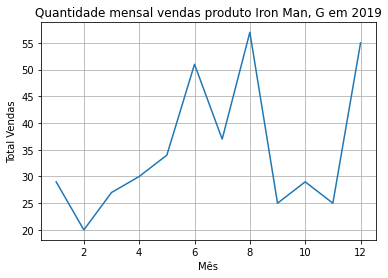

In [15]:
df_merge_plot = df_merge_prod.drop(["ID_x", "ID_y"], axis=1)

df_merge_plot["Year"] = pd.DatetimeIndex(df_merge_plot["Date"]).year
df_merge_plot["Month"] = pd.DatetimeIndex(df_merge_plot["Date"]).month  

df_merge_plot = df_merge_plot[df_merge_plot.Year.eq(2019)]
df_merge_plot = df_merge_plot[df_merge_plot.Name.eq("Iron Man")]
df_merge_plot = df_merge_plot[df_merge_plot.Size.eq("G")]

display(df_merge_plot)

sales_month_2019 = df_merge_plot.groupby('Month').size()
print(sales_month_2019)

plot_month = sales_month_2019.plot(title="Quantidade mensal vendas produto Iron Man, G em 2019")
plot_month.set_xlabel('Mês')
plot_month.set_ylabel('Total Vendas')
plot_month.grid()

**8. Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores?**

In [23]:
df_merge_receita = df_merge_prod.drop(["ID_x", "ID_y", "ClientID", "ProductID", "Size", "Name"], axis=1)

df_merge_receita["Year"] = pd.DatetimeIndex(df_merge_receita["Date"]).year
df_merge_receita["Month"] = pd.DatetimeIndex(df_merge_receita["Date"]).month  
df_merge_receita = df_merge_receita[df_merge_receita.Year.eq(2019)]
df_merge_receita["receita"] = df_merge_receita.UnitPrice * df_merge_receita.Quantity
df_merge_receita_medidas = df_merge_receita.groupby(["Month"])[["receita"]].agg('sum').reset_index() 

#df_merge_receita.describe()
print("R${:,.2f}".format(df_merge_receita_medidas["receita"].mean()), "R${:,.2f}".format(df_merge_receita_medidas["receita"].median()), "R${:,.2f}".format(df_merge_receita_medidas["receita"].std()))

R$324,240.93 R$285,989.90 R$105,678.21


**9. Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto? (1 ponto)**  


In [48]:
df_merge_loja = df_merge_receita.merge(df_sheet_4, left_on="StoreID", right_on="ID")
df_merge_loja.sort_values(by="Name", ascending=False).value_counts().head(1)

Discount  UnitPrice  Quantity  StoreID  Date        Year  Month  receita  ID   Name           State
0.08      201.6      1.0       1.0      2019-06-08  2019  6      201.6    1.0  Florianópolis  SC       6
dtype: int64

**10. Suponha que após realizar todas as etapas necessárias, seu time chegou em alguns modelos de forecasting para o volume mensal de vendas. Foram conduzidos alguns experimentos e os resultados de diferentes valores de erro percentual médio (MAPE) são apresentados abaixo. Dos resultados abaixo, qual o mais razoável que você escolheria para colocar o modelo em produção no ambiente do cliente?**   
